In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [ ]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

### General Dataframes

In [26]:
# Create DataFrame from resource dataset
spotify_data_df = pd.DataFrame(spotify_data)
spotify_data_df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [25]:
# Create a DataFrame with columns "id", "name", valence", "danceability", "duration_ms", "energy" and "popularity".
compare1_df = spotify_data_df[["id","name","valence", "danceability","duration_ms", "energy","popularity"]]
compare1_df = compare1_df.set_index("id")
                            
compare1_df.head(10)                            

,name,valence,danceability,duration_ms,energy,popularity
id,,,,,,
4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.279,831667,0.211,4
7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,0.9630,0.819,180533,0.341,5
1o6I8BglA6ylDMrIELygv1,Gati Bali,0.0394,0.328,500062,0.166,5
3ftBPsC5vPBKxYSee08FDH,Danny Boy,0.1650,0.275,210000,0.309,3
4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,0.2530,0.418,166693,0.193,2
4pyw9DVHGStUre4J6hPngr,Gati Mardika,0.1960,0.697,395076,0.346,6
5uNZnElqOS3W4fRmRYPk4T,The Wearing of the Green,0.4060,0.518,159507,0.203,4
02GDntOXexBFUvSgaXLPkd,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",0.0731,0.389,218773,0.088,2
05xDjWH9ub67nJJk82yfGf,La Mañanita - Remasterizado,0.7210,0.485,161520,0.130,0


### Classifying Popularity into intervals from 1 to 10

In [27]:
# Establish the bins.
popularity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["Least Popular (1)", "2", "3", "4", "5", "6", "7", "8", "9", "Most Popular (10)"]

In [28]:
# Use "pd.cut" to categorize popularity based on the bins.
compare1_df["Popularity Bin"] = pd.cut(compare1_df["popularity"], popularity_bins, labels=labels, include_lowest=True)
compare1_df.head()

,name,valence,danceability,duration_ms,energy,popularity,Popularity Bin
id,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.279,831667,0.211,4,Least Popular (1)
7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,0.9630,0.819,180533,0.341,5,Least Popular (1)
1o6I8BglA6ylDMrIELygv1,Gati Bali,0.0394,0.328,500062,0.166,5,Least Popular (1)
3ftBPsC5vPBKxYSee08FDH,Danny Boy,0.1650,0.275,210000,0.309,3,Least Popular (1)
4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,0.2530,0.418,166693,0.193,2,Least Popular (1)


### Dataframes of Popularity versus selected variables

In [29]:
# First comparison DataFrame: popularity x valence
valence_mean = pd.DataFrame(compare1_df.groupby(["Popularity Bin"]).mean()["valence"])
valence_mean

,valence
Popularity Bin,
Least Popular (1),0.504878
2,0.521872
3,0.558622
4,0.553431
5,0.538381
6,0.517501
7,0.505782
8,0.504800
9,0.490849


In [30]:
# Second comparison DataFrame: popularity x danceability
danceability_mean = pd.DataFrame(compare1_df.groupby(["Popularity Bin"]).mean()["danceability"])
danceability_mean

,danceability
Popularity Bin,
Least Popular (1),0.501948
2,0.495730
3,0.514158
4,0.535963
5,0.555624
6,0.575951
7,0.605805
8,0.645241
9,0.675633


In [31]:
# Third comparison DataFrame: popularity x duration in ms
duration_ms_mean = pd.DataFrame(compare1_df.groupby(["Popularity Bin"]).mean()["duration_ms"])
duration_ms_mean

,duration_ms
Popularity Bin,
Least Popular (1),213735.292770
2,218835.366946
3,236296.578545
4,244078.799707
5,243520.614033
6,238768.465761
7,224962.221315
8,215719.373251
9,204634.788235


In [32]:
# Fourth comparison DataFrame: popularity x energy
energy_mean = pd.DataFrame(compare1_df.groupby(["Popularity Bin"]).mean()["energy"])
energy_mean

,energy
Popularity Bin,
Least Popular (1),0.277592
2,0.352427
3,0.492705
4,0.546723
5,0.594089
6,0.615521
7,0.618416
8,0.635785
9,0.611099


In [33]:
# Merge previous dataframes of comparison
merge1_df = pd.merge(valence_mean, danceability_mean, on="Popularity Bin")
merge2_df = pd.merge(merge1_df,duration_ms_mean, on="Popularity Bin")
merge3_df = pd.merge(merge2_df,energy_mean, on="Popularity Bin")
merge3_df

,valence,danceability,duration_ms,energy
Popularity Bin,,,,
Least Popular (1),0.504878,0.501948,213735.292770,0.277592
2,0.521872,0.495730,218835.366946,0.352427
3,0.558622,0.514158,236296.578545,0.492705
4,0.553431,0.535963,244078.799707,0.546723
5,0.538381,0.555624,243520.614033,0.594089
6,0.517501,0.575951,238768.465761,0.615521
7,0.505782,0.605805,224962.221315,0.618416
8,0.504800,0.645241,215719.373251,0.635785
9,0.490849,0.675633,204634.788235,0.611099


### Plotting Popularity versus variables

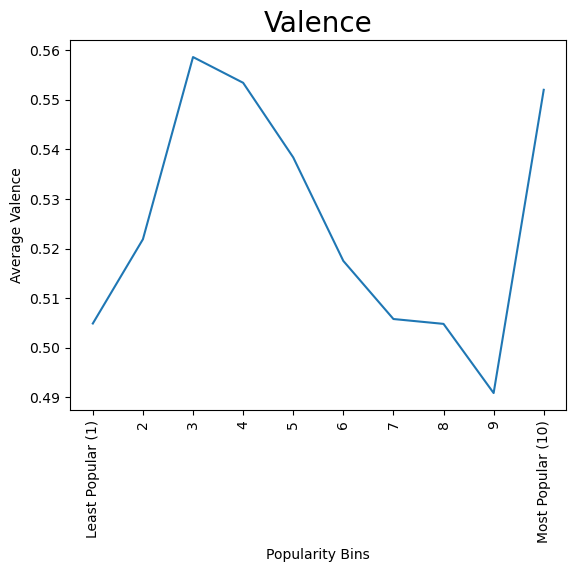

In [39]:
# Plotting valence values versus popularity
plt.plot(labels,valence_mean)
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Popularity Bins")
plt.ylabel("Average Valence")
plt.title("Valence", fontdict={"fontsize": 20})
plt.show()

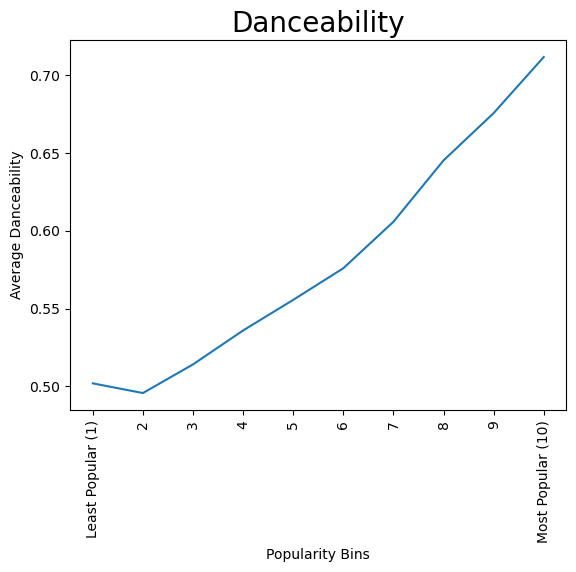

In [40]:
# Plotting danceability values versus popularity
plt.plot(labels,danceability_mean)
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Popularity Bins")
plt.ylabel("Average Danceability")
plt.title("Danceability", fontdict={"fontsize": 20})
plt.show()

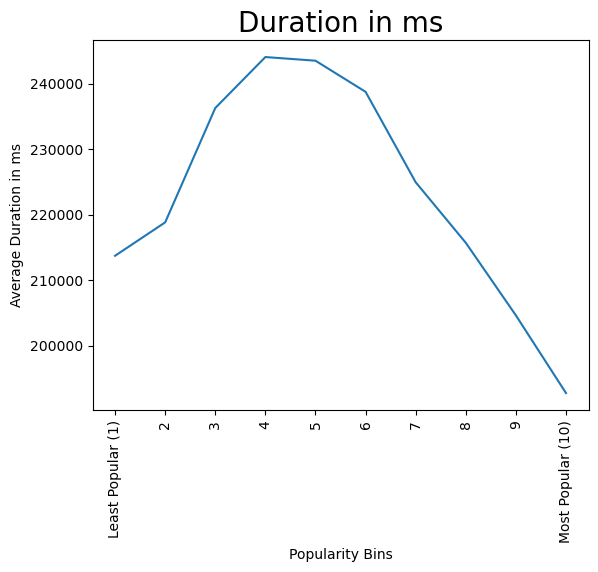

In [41]:
# Plotting duration in ms values versus popularity
plt.plot(labels,duration_ms_mean)
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Popularity Bins")
plt.ylabel("Average Duration in ms")
plt.title("Duration in ms", fontdict={"fontsize": 20})
plt.show()

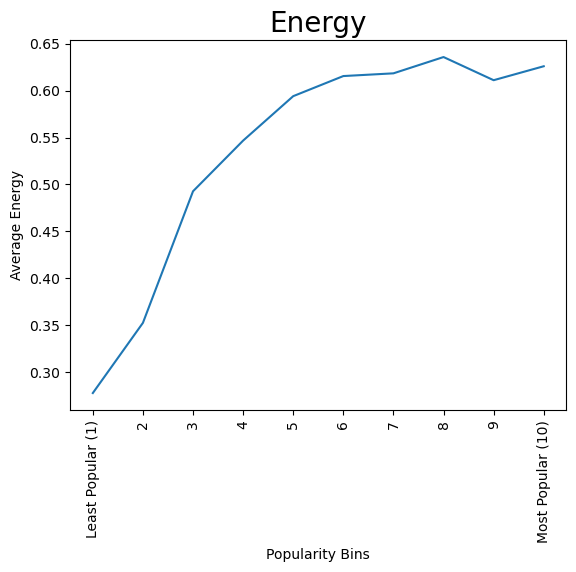

In [42]:
# Plotting energy values versus popularity
plt.plot(labels,energy_mean)
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Popularity Bins")
plt.ylabel("Average Energy")
plt.title("Energy", fontdict={"fontsize": 20})
plt.show()

### Comparing variables with each other, versus popularity 

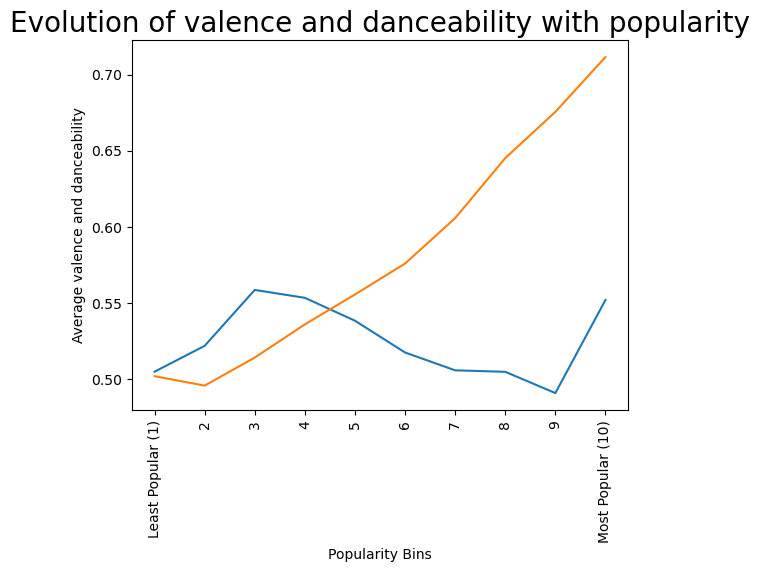

In [44]:
# Plotting valence and danceability values versus popularity
plt.plot(labels, valence_mean)
plt.plot(labels, danceability_mean)
plt.xticks(rotation = "vertical")
plt.xlabel("Popularity Bins")
plt.ylabel("Average valence and danceability")
plt.title("Evolution of valence and danceability with popularity", fontdict={"fontsize": 20})
plt.show()

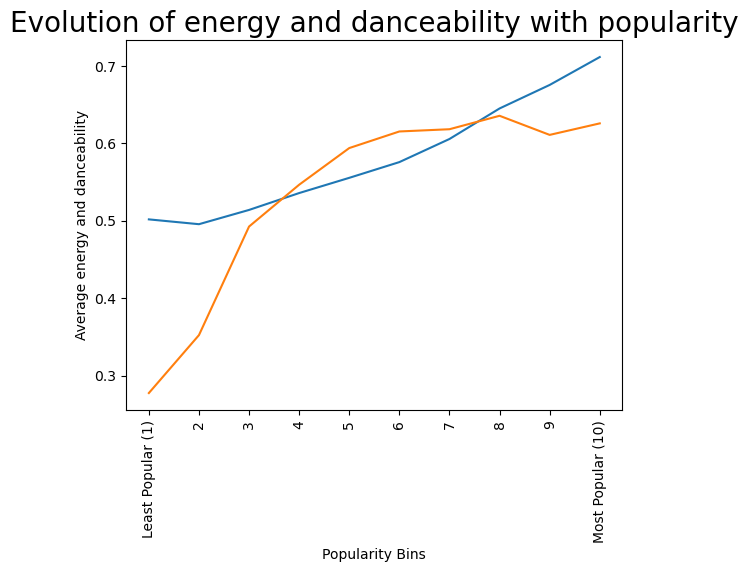

In [45]:
# Plotting energy and danceability values versus popularity
plt.plot(labels, danceability_mean)
plt.plot(labels, energy_mean)
plt.xticks(rotation = "vertical")
plt.xlabel("Popularity Bins")
plt.ylabel("Average energy and danceability")
plt.title("Evolution of energy and danceability with popularity", fontdict={"fontsize": 20})
plt.show()